# ***Credit Card Customers***

<center>
<img src = "https://www.freewebheaders.com/wp-content/gallery/office-finance/finances-and-business-graphs-and-charts-web-header.jpg"
height =>
</center>
<right><font size="1"><i> Source: https://www.freewebheaders.com</i></font></right>

<strong>CS 624 - Data Analytics & Big Data</strong>

AJ Broderick *(UIN 01244170)* \
abrod006@odu.edu \

Jasmine Nees *(UIN 01223861)* \
jking044@odu.edu \


---
## <strong>***Project Plan***</strong>
---

### **Assignment 1**
For the first assignment, the data will be explored using basic Python code to see what's available and to create visualizations. \
From the analysis of the data, metrics will be selected for the second assignment.

### **Assignment 2**
From Assignment 1, a split, train, test model will be developed. Since the data has the churned customers, it will make it easier to split the data to train the resulting model. The output of the model will be to identify customers that have churned to see if there's a way to flag customers that might churn so management can reach out to retain the customer

---
## <strong>***Data Source***</strong>
---

**Credit Card Churn** \
The dataset is a collection of over 10,000 bank customers utilizing credit card customers. The dataset was originally collected in an effort to make data-driven decisions within the bank. It was posted by Sakshi Goyal on Kaggle. \

Source: Kaggle\
[Credit Card Customers](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data)

**Why this data?** \
This dataset is interesting because of the relevancy of the information, as most people are familiar with credit cards, leading to a lower learning curve of the output. And as mentioned above, the data is large which allows for a variety of approaches to an analysis. Also within the data, there is a mix of quantitative and qualitative attributes, which gives us freedom to evaluate and chose which ones to dig into.

---
##<strong>***Python Code*** </strong>
---

---
### **Data Import**
---

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
#this segment is needed to connect to GoogleDrive where downloaded data is located
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = DataFrame(pd.read_csv("/content/drive/MyDrive/CS 624/BankChurners.csv"))

#Dropping last two columns from the dataframe. It was recommended by the creator of the Kaggle data, as it was included from their original analysis of the data
df = df.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ])

cust_4050 = df.loc[df['Customer_Age'].between(40,59)]

---
### **Step 1: Initial Exploration of Data**
---


Looking at a sample of the data using .head()

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


----
Pulling information about the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

One thing to note is that since this data was provided and already used by the original author for analytics, all of the data is fairly clean already. This is seen with all of the columns having the same 10,127 of non-null entries. \
This makes it a little easier than other datasets that have some columns with missing data. Because of this, it made the decision to do more of a exploratory data analysis easier.

---
Exploration of all columns that contain numeric values

In [ ]:
quant_df = df.select_dtypes(include=np.number) # looking only at quantitative columns
quant_df.loc[:, quant_df.columns != 'CLIENTNUM'].describe().round(2) # excluding customer ID

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


---
### **Step 2: Evaluation of Qualitative columns**
---

Highlight the values in the qualitative columns

In [ ]:
print("Attrition Flag\n",df['Attrition_Flag'].unique())

print("Education Level\n",df['Education_Level'].unique())

print("Marital Status\n",df['Marital_Status'].unique())

print("Income Level\n",df['Income_Category'].unique())

print("Card Category\n",df['Card_Category'].unique())


Attrition Flag
 ['Existing Customer' 'Attrited Customer']
Education Level
 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital Status
 ['Married' 'Single' 'Unknown' 'Divorced']
Income Level
 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card Category
 ['Blue' 'Gold' 'Silver' 'Platinum']


<ipython-input-8-8105352463bb>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  edu.set_xticklabels(edx, rotation=90)
<ipython-input-8-8105352463bb>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  inc.set_xticklabels(incx, rotation=90)


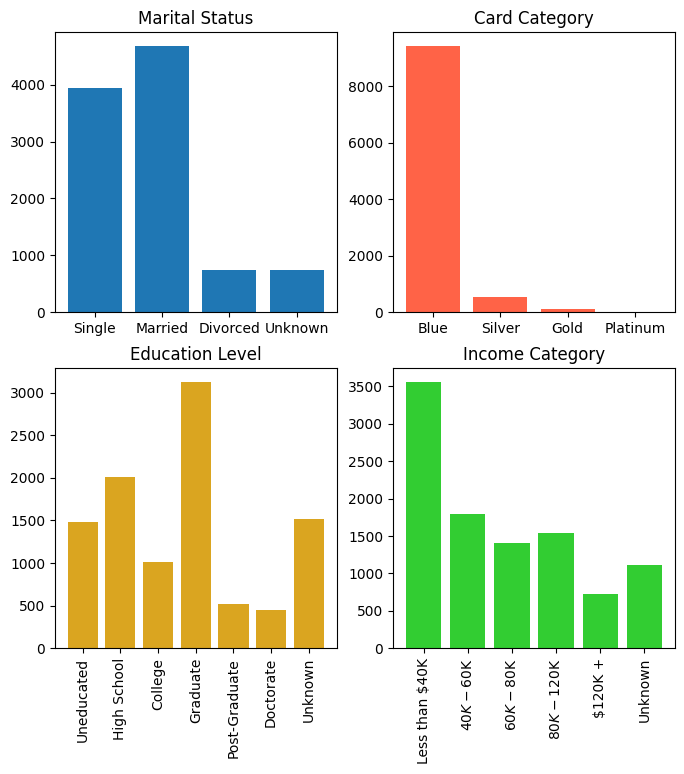

In [ ]:
edu_sort = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']
edy = df.groupby(['Education_Level'])['Education_Level'].count()
edy = edy.reindex(edu_sort)
edx = df['Education_Level'].unique()
edx = sorted(edx, key=edu_sort.index)

mar_sort = ['Single', 'Married', 'Divorced', 'Unknown']
mary = df.groupby(['Marital_Status'])['Marital_Status'].count()
mary = mary.reindex(mar_sort)
marx = df['Marital_Status'].unique()
marx = sorted(marx, key=mar_sort.index)

inc_sort = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
incy = df.groupby(['Income_Category'])['Income_Category'].count()
incy = incy.reindex(inc_sort)
incx = df['Income_Category'].unique()
incx = sorted(incx, key=inc_sort.index)

cc_sort = ['Blue', 'Silver', 'Gold', 'Platinum']
ccy = df.groupby(['Card_Category'])['Card_Category'].count()
ccy = ccy.reindex(cc_sort)
ccx = df['Card_Category'].unique()
ccx = sorted(ccx, key=cc_sort.index)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

mar = plt.subplot(2,2,1)
mar.bar(marx, mary)
mar.set_title('Marital Status')

cc = plt.subplot(2,2,2)
cc.bar(ccx, ccy,color="tomato")
cc.set_title('Card Category')

edu = plt.subplot(2,2,3)
edu.bar(edx, edy, color = "goldenrod")
edu.set_xticklabels(edx, rotation=90)
edu.set_title('Education Level')

inc = plt.subplot(2,2,4)
inc.bar(incx, incy, color = "limegreen")
inc.set_xticklabels(incx, rotation=90)
inc.set_title('Income Category')

plt.show()

Interesting things to note:

**Marital Status**
*   Skew in the Single/Married status
    * *From this, the Marital status probably won't be a good metric for further analysis. Or would focus on one of the two groups with most of the records*

**Credit Card**
*   Super high concentration in the Blue card
    * *Similar to the Marital Status, the Credit Card grouping might be excluding in any further analysis*

**Education**
*   This category has the most distribution amongst the four categories that were analyzed. Interesting that there is such a spike in the 'Graduate' category.

**Income Category**
*   Positive skew with a larger amount of customers at a low level of income

---
### **Step 3: Evaluation of Quantitative columns**
---

Now that the categorical categories have been evaluated, the quantitative ones can be looked at. In comparison to the categorical, there are significantly more qualitative columns, and from the descriptions given of the data on Kaggle, a handful were selected to include in a Pairplot via Seaborn.\
The 'Attrition_Flag' was added as a hue, given that it will be used for Assignment 2, wanted to gauge any correlation in this step.

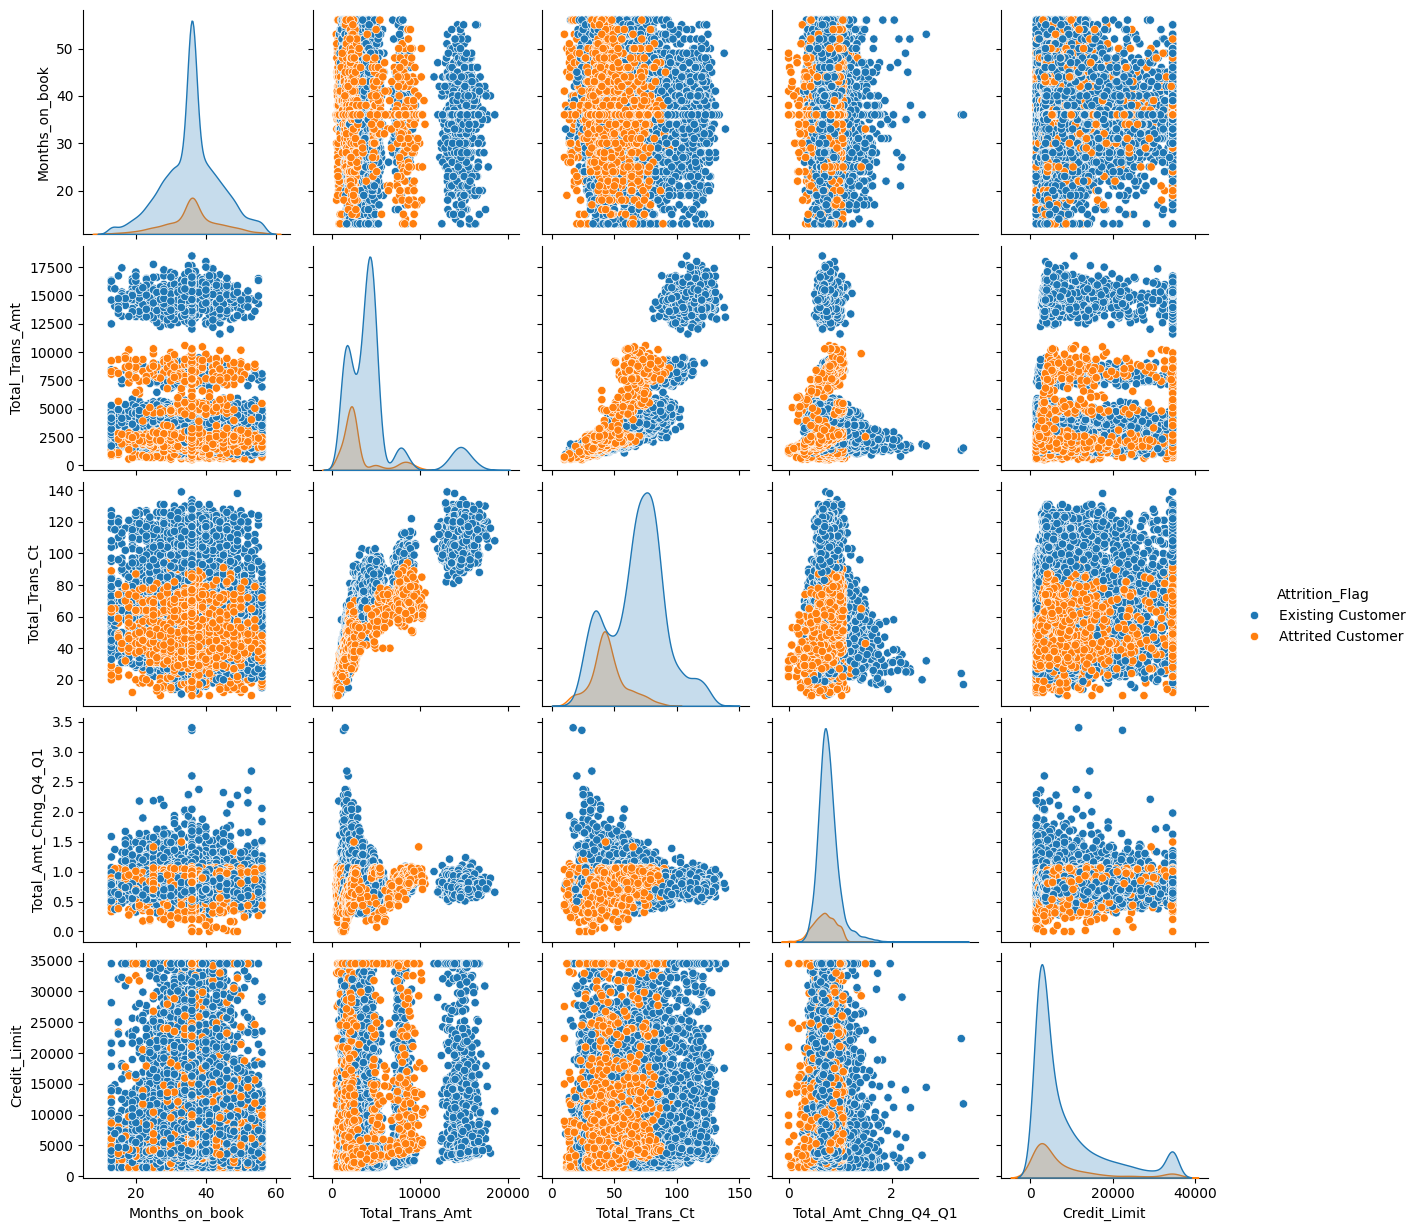

In [ ]:
pp = df[['Months_on_book','Total_Trans_Amt','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Credit_Limit','Attrition_Flag']]
sb.pairplot(pp, hue='Attrition_Flag')

One of the last quantitative categories that was evaluated was the customer's age. During the selection of the dataset, Kaggle provides a quick visual of the columns, and it was noticed that the 'Customer_Age' column had a normal distribution, and is highlighted below.

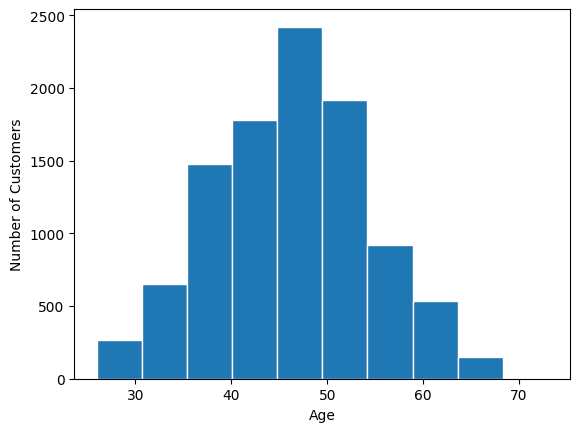

In [ ]:
plt.hist(df['Customer_Age'], edgecolor='white', label='d')
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title = ('Age Distribution')

---
### **Step 4: Data Visualization - Customer Credit Usage by Age Analysis**
---

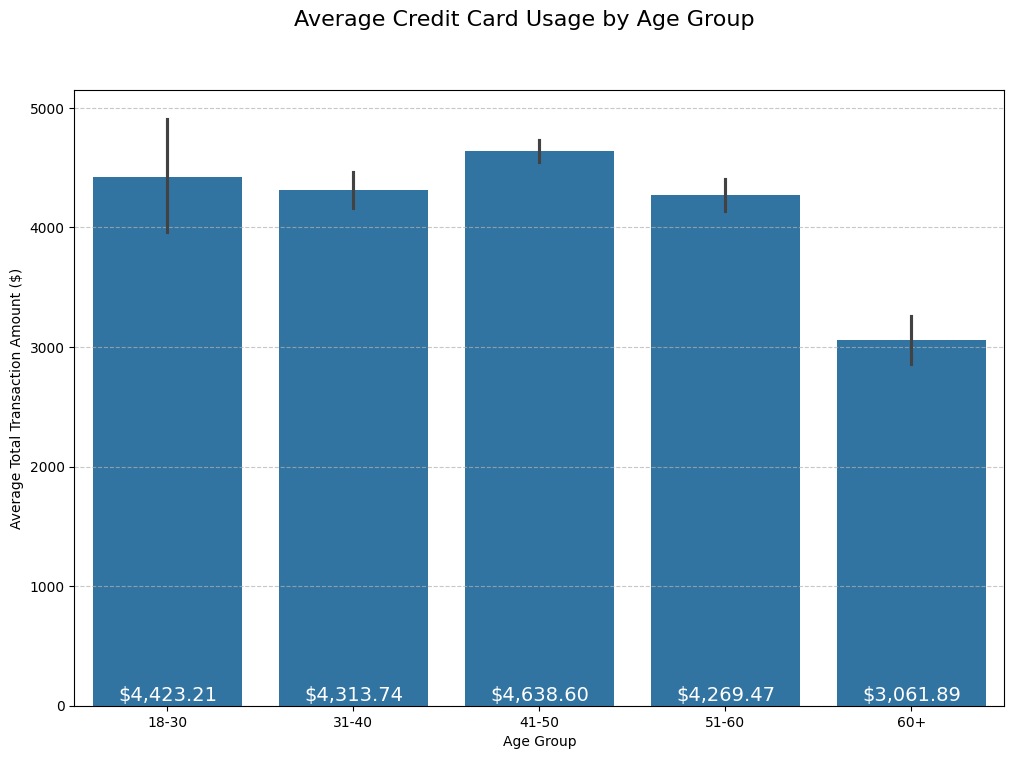

In [ ]:
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

plt.figure(figsize=(12,8))

mean_values = df.groupby('Age_Group')['Total_Trans_Amt'].mean().values

sb.barplot(x='Age_Group', y='Total_Trans_Amt', data=df)

plt.xlabel('Age Group')
plt.ylabel('Average Total Transaction Amount ($)')
plt.suptitle('Average Credit Card Usage by Age Group', fontsize=16)

for i, mean in enumerate(mean_values):
    plt.text(i, 5, f'${mean:,.2f}', ha='center', va='bottom', fontsize=14, color='white')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The 41-50 and 51-60 age groups are among the highest, indicating that, on average, individuals in their 40s and 50s have high credit card usage; however, it is apparent that the 18-30 and the 31-40 age groups also have significant credit card usage, while the 60+ group has the lowest. This seems to primarily indicate that, based on the dataset, individuals under the age of 60 have high credit card usage while individuals 60 or older have lower-to-moderate credit card usage on average.

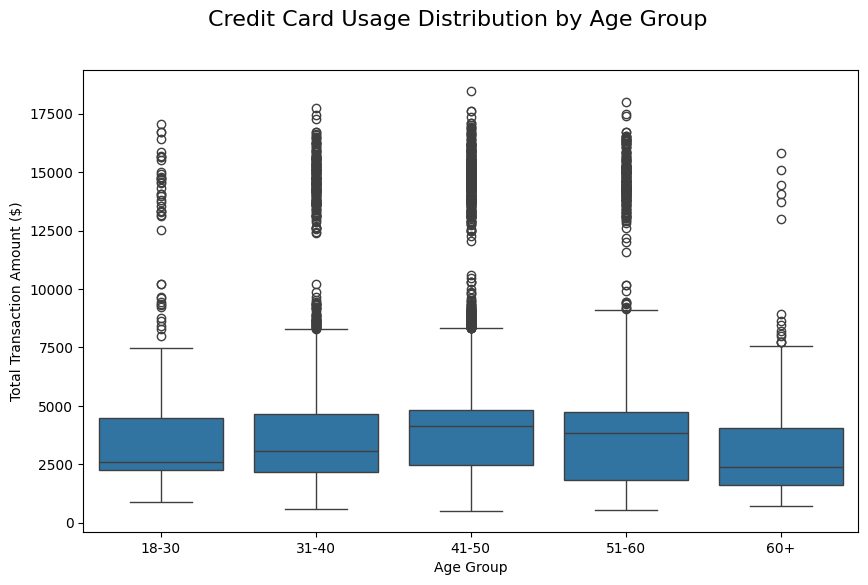

In [ ]:
plt.figure(figsize=(10,6))

sb.boxplot(x='Age_Group', y='Total_Trans_Amt', data=df)

plt.suptitle('Credit Card Usage Distribution by Age Group', fontsize=16, fontweight=)
plt.xlabel('Age Group')
plt.ylabel('Total Transaction Amount ($)')

plt.show()

The boxplot indicates that the 41-50 and 51-60 age groups generally have higher credit card usage as well as the median lines appearing higher in these groups, similar to that of the bar plot. There also is a large amount of higher credit card usage outliers for the 31-40, 41-50, and 51-60 age groups.